In [2]:
# установка дополнительных библиотек:
# !pip install Afinn
# !pip install nltk[twitter] 
# !pip install --upgrade category_encoders
# !pip install geopy

In [12]:
# инструменты анализа и обработки данных
import pandas as pd
import numpy as np
import re
import geopy.distance
from scipy import stats
from category_encoders import  OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif

In [ ]:
# инструменты для лингвистического анализа:
import string
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from textblob import TextBlob, Blobber
# from textblob.sentiments import NaiveBayesAnalyzer
from afinn import Afinn
nltk.download('vader_lexicon')

In [ ]:
# инструменты анализа и обработки данных
import pandas as pd
import numpy as np
import re
import geopy.distance
from scipy import stats
from category_encoders import  OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif

In [ ]:
# параметры отображения содержимого на экране:
from IPython.display import display
from IPython.display import Image
from termcolor import colored
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_rows', 200)

In [ ]:
# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# фиксируем RANDOM_SEED и версию пакетов, чтобы эксперименты были воспроизводимы:
# RANDOM_SEED = 42
# !pip freeze > requirements.tx

In [ ]:
# инструменты для построения модели:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [13]:
%%capture

# загружаем изображения
# !ls ../input/projectdata/img_score.png
# !ls ../input/projectdata/img.png
# !ls ../input/projectdata/wait.png



In [16]:
# hotels = pd.read_csv('data/hotels.csv')
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [18]:
# Количество уникальных значений
hotels.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             225
negative_review                               248828
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               311737
review_total_positive_word_counts                354
total_number_of_reviews_reviewer_has_given       194
reviewer_score                                    37
tags                                           47135
days_since_review                                731
lat                                             1473
lng                                             1473
dtype: int64

In [20]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Разделение набора данных

Прежде всего, для создания модели необходимо разделить датафрейм на набор данных,   
которые мы будем использовать для обучения модели, именуемый , и на целевую переменную — величину,   
значение которой мы будем предсказывать, (в нашем случае это рейтинг отелей).  

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели)   
и тестовый (test, используется для оценки точности модели).   
Такое деление осуществляется с помощью специального метода train_test_split() библиотеки sklearn.   
В параметрах метода (параметр test_size) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели.   
В нашем коде эта часть составляет 25 %, или 0.25.

In [21]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

In [22]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  
    
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
    
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Создание и обучение модели

Сам процесс создания и тестирования модели занимает всего четыре строчки кода.   
В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм RandomForestRegressor.   
Он реализован в библиотеке sklearn.

In [23]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

In [24]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
    
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
    
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

Оценка качества модели

Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас MAPE = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

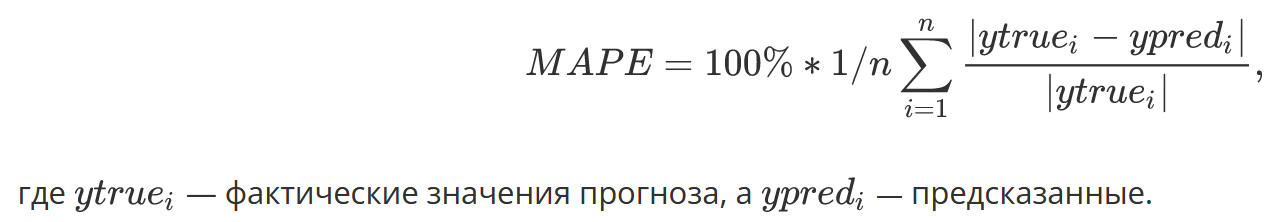

Для расчета MAPE сравним предсказанные нашей моделью значения с реальными и посмотрим на значение ошибки.

In [25]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку 
# предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# MAPE: 0.14134701147226017

MAPE: 0.14141862546640768


✍ Что делать дальше?

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных.

При подготовке датасета необходимо будет вспомнить все шаги, которые мы проделывали в модулях EDA.   
Нам нужно будет не только избавиться от пропущенных значений и нечисловых признаков,   
но и спроектировать новые признаки на основе информации, уже содержащейся в данных,   
или используя внешние источники данных, если это возможно.   
Также мы закодируем и преобразуем признаки, а после отберём лучшие из них.

Задачу, которая стоит перед вами, можно свести к пяти пунктам:

        Удаление строковых значений. Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.  

        Очистка от пропущенных значений. На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.   

        Создание новых признаков. Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.  

        Преобразование признаков. Применим различные преобразования над признаками вроде нормализации, стандартизации.  
        
        Отбор признаков. Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

Строковые данные

В исходном наборе данных всего девять столбцов содержат числовые данные.   
Так что просто удалить все object-значения и считать задачу выполненной не получится.   
Мы сделали это в прошлом юните, чтобы получить значение метрики.   
Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными   
и извлечь из них как можно больше информации, которую можно представить в числовом виде.

In [26]:
# Количество уникальных значений
hotels.nunique(dropna=False)

additional_number_of_scoring                   480
average_score                                   34
review_total_negative_word_counts              402
total_number_of_reviews                       1142
review_total_positive_word_counts              354
total_number_of_reviews_reviewer_has_given     194
reviewer_score                                  37
lat                                           1473
lng                                           1473
dtype: int64